In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# Load dataset
df = pd.read_csv("C:/Users/Josiah/Downloads/users_data.csv",sep=",",index_col="user_id")




In [4]:
df.head(10)

,loan_score,device_rating,data_quality,ltv_rate,bureau_score,total_tenure,months_active,savings_score,tx_score,usage_score,airtime_score,cluster
user_id,,,,,,,,,,,,
146245,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,NaN
248802,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,NaN
13873,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,NaN
35230,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,NaN
653322,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,NaN
61550,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,NaN
399240,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,NaN
385139,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,NaN
572500,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,NaN


In [5]:
# Displaying basic information
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1599 entries, 146245 to 189603
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   loan_score     1599 non-null   float64
 1   device_rating  1599 non-null   float64
 2   data_quality   1599 non-null   float64
 3   ltv_rate       1599 non-null   float64
 4   bureau_score   1599 non-null   float64
 5   total_tenure   1599 non-null   float64
 6   months_active  1599 non-null   float64
 7   savings_score  1599 non-null   float64
 8   tx_score       1599 non-null   float64
 9   usage_score    1599 non-null   float64
 10  airtime_score  1599 non-null   float64
 11  cluster        0 non-null      float64
dtypes: float64(12)
memory usage: 162.4 KB


,loan_score,device_rating,data_quality,ltv_rate,bureau_score,total_tenure,months_active,savings_score,tx_score,usage_score,airtime_score,cluster
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,0.0
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,NaN
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,NaN
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,NaN
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,NaN
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,NaN
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,NaN
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,NaN


In [6]:
df.isna().sum()

loan_score          0
device_rating       0
data_quality        0
ltv_rate            0
bureau_score        0
total_tenure        0
months_active       0
savings_score       0
tx_score            0
usage_score         0
airtime_score       0
cluster          1599
dtype: int64

In [7]:
df = df.drop(columns="cluster")

In [8]:
# Standarding the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

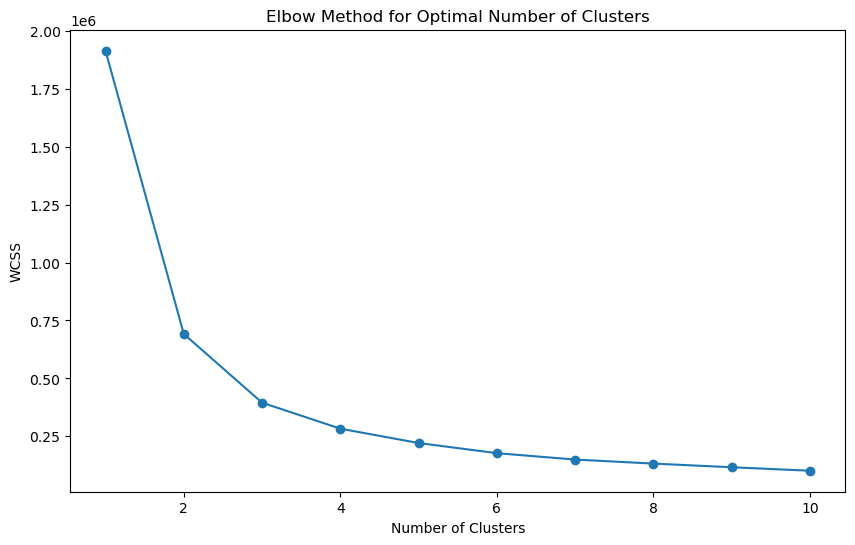

In [9]:
# Calculating WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


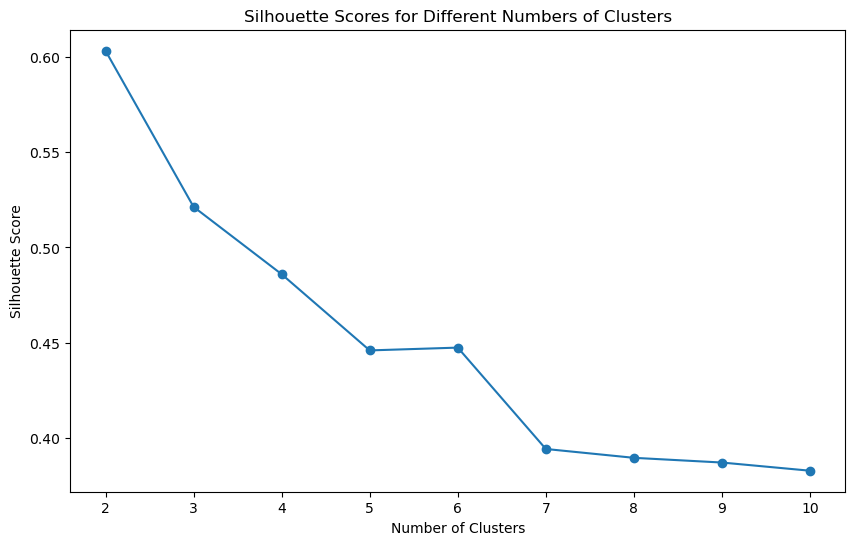

In [10]:
# Calculating silhouette scores for different numbers of clusters
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    labels = kmeans.fit_predict(df)
    silhouette_scores.append(silhouette_score(df, labels))

# Plotting the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [11]:
# Fitting KMeans with the chosen number of clusters
n_clusters = 5  # Example: choose based on the above analysis
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(df)

# Adding cluster labels to the original DataFrame
df['Cluster'] = clusters


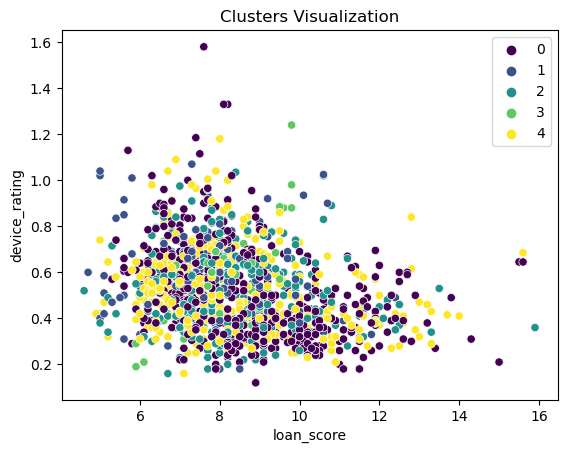

In [12]:
sns.scatterplot(x=df['loan_score'], y=df['device_rating'], hue=clusters, palette='viridis')
plt.title('Clusters Visualization')
plt.xlabel('loan_score')
plt.ylabel('device_rating')
plt.show()

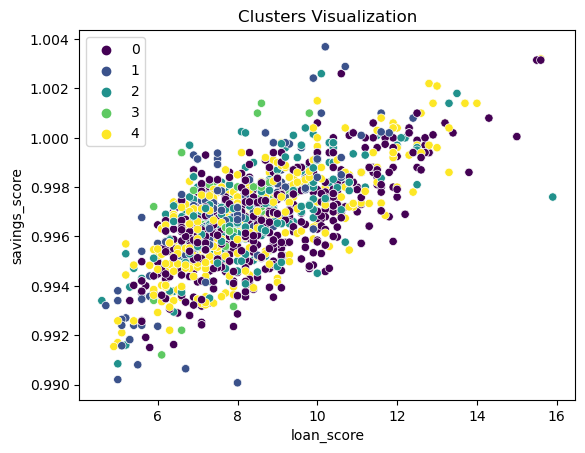

In [13]:
sns.scatterplot(x=df['loan_score'], y=df['savings_score'], hue=clusters, palette='viridis')
plt.title('Clusters Visualization')
plt.xlabel('loan_score')
plt.ylabel('savings_score')
plt.show()

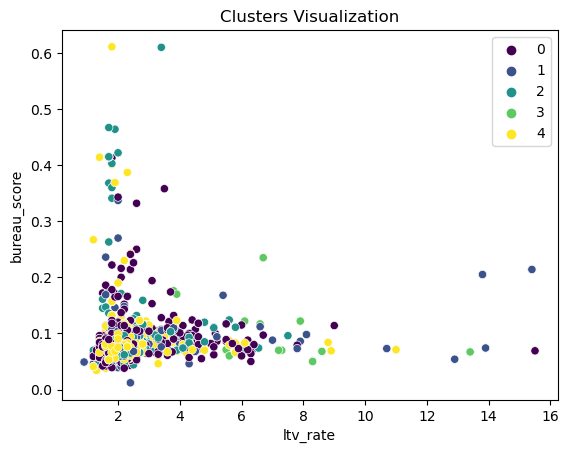

In [14]:
sns.scatterplot(x=df['ltv_rate'], y=df['bureau_score'], hue=clusters, palette='viridis')
plt.title('Clusters Visualization')
plt.xlabel('ltv_rate')
plt.ylabel('bureau_score')
plt.show()

In [15]:
df.columns

Index(['loan_score', 'device_rating', 'data_quality', 'ltv_rate',
       'bureau_score', 'total_tenure', 'months_active', 'savings_score',
       'tx_score', 'usage_score', 'airtime_score', 'Cluster'],
      dtype='object')

# Methodoloy 1: 

1. Preprocessing: Data was standardized to ensure all features contribute equally to the clustering process. 

2. Choosing Number of Clusters:


- Elbow Method: The plot helps identify a point where adding more clusters yields little improvement in WCSS. This is a good heuristic to choose the number of clusters.
- Silhouette Score: Measures how similar an object is to its own cluster compared to other clusters. Higher scores indicate better-defined clusters.


3. Clustering: K-Means was used to partition the data into the chosen number of clusters. Each user is assigned to a cluster based on similarity in feature space.


4. Cluster Analysis: Cluster centers provide the average feature values for users in each cluster. This helps in understanding the typical profile of users in each cluster.

5. Visualization: Scatter plots help in understanding how clusters are distributed and separated in feature space.

6. The chosen number of clusters (5) provides a balance between granularity and interpretability.

7. Profiles of clusters help in identifying distinct user segments based on their characteristics.


In [16]:
# List of features used for clustering (excluding 'Cluster')
features_for_clustering = ['loan_score', 'device_rating', 'data_quality', 'ltv_rate',
                           'bureau_score', 'total_tenure', 'months_active', 'savings_score',
                           'tx_score', 'usage_score', 'airtime_score']

# Scaling the data using the correct features (exclude 'Cluster')
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features_for_clustering])

# Fitting the KMeans model on the scaled data
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_data)


C:\Users\Josiah\anaconda3\Newanaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

In [17]:
# Performing inverse transform on the cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Creating a DataFrame for cluster profiles
cluster_profiles = pd.DataFrame(cluster_centers, columns=features_for_clustering)
print(cluster_profiles)


   loan_score  device_rating  data_quality  ltv_rate  bureau_score  \
0    8.243917       0.534377      0.296617  3.236944      0.088501   
1    7.498011       0.649376      0.114810  2.236438      0.084244   
2    7.107395       0.447781      0.241254  2.159807      0.068048   
3   10.622973       0.407419      0.488595  2.715000      0.087065   
4    8.485714       0.528214      0.501071  1.989286      0.359643   

   total_tenure  months_active  savings_score  tx_score  usage_score  \
0     27.640950      91.237389       0.997490  3.285697     0.630653   
1     11.751356      34.264014       0.996618  3.371410     0.590615   
2     17.522508      39.430868       0.994435  3.409678     0.680257   
3      9.975676      28.575676       0.998179  3.181568     0.718568   
4     15.357143      63.250000       0.997086  3.043214     1.278929   

   airtime_score  
0       9.842532  
1       9.949699  
2      11.752304  
3      10.611802  
4       9.496429  


# Result 1 interpretation

Based on the chosen qualities, each row represents a cluster center and provides information about the "average" attributes of users in that cluster. These cluster profiles provide information about user segmentation.

 ***Conclusion:

The clusters provide a useful segmentation of users based on various financial and activity-related metrics:

High loan score, long tenure, high airtime: financially stable and active users.
Moderate loan scores, new users: decent activity but shorter histories.
Very high loan score, newer users: potential high-value customers but still early in their financial lifecycle.
Higher creditworthiness: high bureau score and longer tenures with average-to-high usage and savings.
These insights could be used to tailor marketing, financial products, or user engagement strategies depending on the specific profile of each cluster.




In [18]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


# Methodology 2: Using neural approach for Clustering

1. Autoencoder for Dimensionality Reduction:

- An autoencoder is a type of neural network used to learn a compressed representation of data. It consists of two parts: the encoder, which compresses the input data, and the decoder, which attempts to reconstruct the original data from the compressed version.
- The compressed (bottleneck) representation learned by the autoencoder can capture the important features of the data, making it useful for clustering.

2. K-means Clustering on Encoded Features:

- After training the autoencoder, we can extract the latent space representations (the bottleneck layer).
- Then, we apply K-means clustering on these learned representations to group the data points into clusters.

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2340 - val_loss: 1.2847
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2178 - val_loss: 1.2486
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1774 - val_loss: 1.2160
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1265 - val_loss: 1.1856
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0885 - val_loss: 1.1555
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0554 - val_loss: 1.1248
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0046 - val_loss: 1.0940
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9825 - val_loss: 1.0630
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9139 - val_loss: 1.0326
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9181 - val_loss: 1.0021
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9207 - val_loss: 0.9723
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8666 - val_lo

C:\Users\Josiah\anaconda3\Newanaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   loan_score  device_rating  data_quality  ltv_rate  bureau_score  \
0    8.783939       0.527823      0.430395  2.538806      0.134280   
1    8.321241       0.626599      0.271233  2.555018      0.087609   
2   10.004929       0.527957      0.454805  2.622275      0.090385   
3    8.350728       0.571770      0.279753  2.587622      0.088024   
4    8.797389       0.527858      0.448409  2.599870      0.088052   

   total_tenure  months_active  savings_score  tx_score  usage_score  \
0     20.974323      63.989677       0.997306  3.311131     0.827596   
1     16.234848      46.676544       0.996755  3.434550     0.660572   
2     15.884382      46.611919       0.998401  3.311195     0.712254   
3     21.727188      72.881180       0.997304  3.316649     0.661832   
4     16.676216      46.629555       0.996761  3.312763     0.700587   

   airtime_score  
0      10.423194  
1      10.671319  
2      10.461993  
3      10.424695  
4      11.464927  


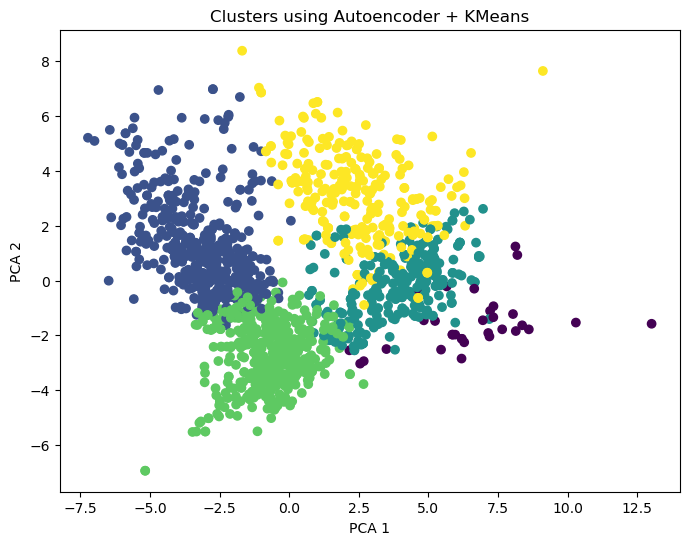

In [21]:
from tensorflow.keras import layers, models
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt




# Assuming df is your input data (without labels)
df_scaled = StandardScaler().fit_transform(df)

# Autoencoder Architecture
input_dim = df_scaled.shape[1]
encoding_dim = 6  # You can adjust this depending on the dimensionality reduction you want

input_layer = layers.Input(shape=(input_dim,))
encoder = layers.Dense(encoding_dim, activation='relu')(input_layer)
decoder = layers.Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = models.Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Traininig the Autoencoder
history = autoencoder.fit(df_scaled, df_scaled, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)

# Extracting the Encoder model to get the compressed representations
encoder_model = models.Model(inputs=input_layer, outputs=encoder)

# Getting the compressed latent representations (bottleneck features)
encoded_data = encoder_model.predict(df_scaled)

# K-means on encoded features
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(encoded_data)

# Adding the cluster labels to the original dataframe
df['Cluster'] = clusters

# Analysing cluster centers based on the original features
cluster_centers = kmeans.cluster_centers_
decoded_centers = autoencoder.layers[-1](cluster_centers).numpy()

scaler = StandardScaler()

# Fitfing the scaler on the relevant data 
scaler.fit(df.values[:, :-1])  # Fit excluding the cluster column


# Ensuring that decoded_centers only includes the features (exclude cluster labels)
decoded_centers = decoded_centers[:, :-1]  # Exclude the cluster column from decoded_centers



# Now applying inverse_transform on the decoded_centers
cluster_profiles = pd.DataFrame(scaler.inverse_transform(decoded_centers), columns=df.columns[:-1])  # Excluding the Cluster column




# Visualizing Clusters using PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(encoded_data)

plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=clusters, cmap='viridis')
plt.title("Clusters using Autoencoder + KMeans")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# Result Summary


- Cluster Profiles Summary:
    Each row in the result represents a cluster, and the values correspond to the feature averages (cluster centers) within that cluster. 
    
    For example:

1. Cluster 0 has an average loan_score of 8.78, a device_rating of 0.53, and so on.
2. Cluster 1 has slightly lower averages for features like loan_score (8.32) and device_rating (0.63), and so forth for other clusters.


- Key Insights:

1. Loan Score: Clusters 2 and 4 seem to have higher average loan scores (10.00 and 8.80), possibly indicating users with better financial status.

2. Device Rating: The device rating remains fairly consistent across clusters, but Cluster 1 has a slightly higher value (0.63).

3. Tenure and Activity: Cluster 3 shows a much higher total_tenure (21.73) and months_active (72.88), which could indicate a group of more long-term or active users.

4. Airtime Score: Cluster 4 stands out with a significantly higher airtime score (11.46), suggesting that users in this cluster may be using more airtime-related services.

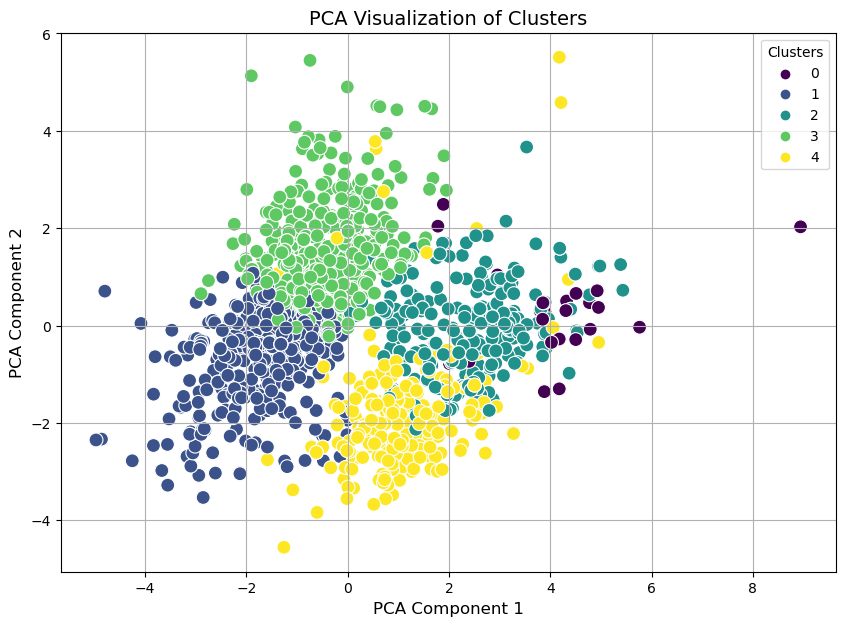

In [22]:
#Visualizing the Clusters


encoded_data = df_scaled 

# Performing PCA to reduce the data to 2 dimensions for visualization
df_reduced = pca.fit_transform(encoded_data)  # Reducing to 2D for visualization

# Creating a scatter plot of the reduced data with clusters color-coded
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_reduced[:, 0], y=df_reduced[:, 1], hue=clusters, palette='viridis', s=100)
plt.title('PCA Visualization of Clusters', fontsize=14)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.legend(title='Clusters')
plt.grid(True)
plt.show()